In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


In [2]:
#Loading the csv file and printing the first five rows
df = pd.read_csv(r"C:\Users\Tega\Downloads\TSLA.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [3]:
#printing statistical information of the dataset
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


In [4]:
#getting more information on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


In [5]:
#checking for duplicates
df[df.duplicated()]

,Date,Open,High,Low,Close,Adj Close,Volume


In [6]:
#There are 2,416 rows and 7 columns in the dataset.
#The dataset has no null or duplicate value.

Text(0.5, 1.0, 'The Trend for opening price')

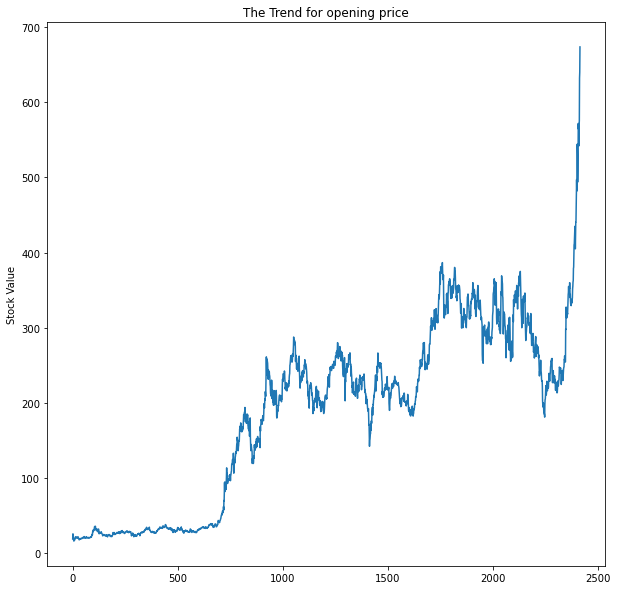

In [7]:
#Plotting the trend for opening price
plt.figure(figsize = (10, 10))
sns.lineplot(data= df.iloc[ : , 1])
plt.ylabel("Stock Value")
plt.title("The Trend for opening price")

Text(0.5, 1.0, 'The Trend for high price')

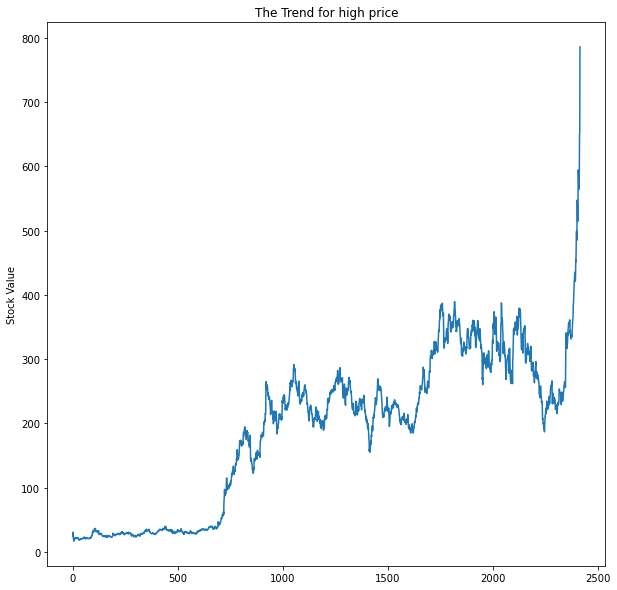

In [8]:
#plotting the trend for high price
plt.figure(figsize = (10, 10))
sns.lineplot(data= df.iloc[ : , 2])
plt.ylabel("Stock Value")
plt.title("The Trend for high price")

Text(0.5, 1.0, 'The Trend for low price')

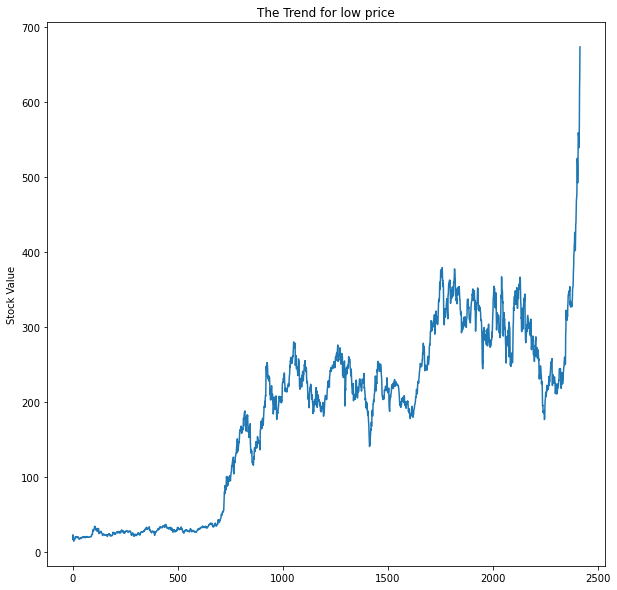

In [9]:
#plotting the trend for low price
plt.figure(figsize = (10, 10))
sns.lineplot(data= df.iloc[ : , 3])
plt.ylabel("Stock Value")
plt.title("The Trend for low price")

Text(0.5, 1.0, 'The Trend for closing price')

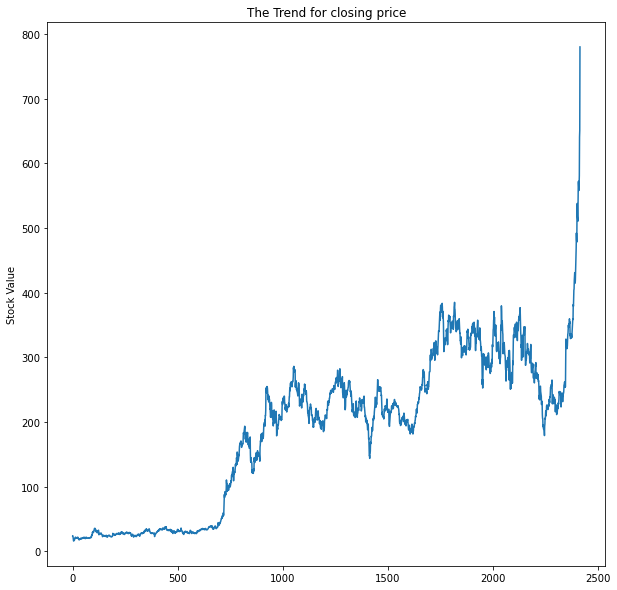

In [10]:
#plotting the trend for closing price
plt.figure(figsize = (10, 10))
sns.lineplot(data= df.iloc[ : , 4])
plt.ylabel("Stock Value")
plt.title("The Trend for closing price")

Text(0.5, 1.0, 'The Trend for volume')

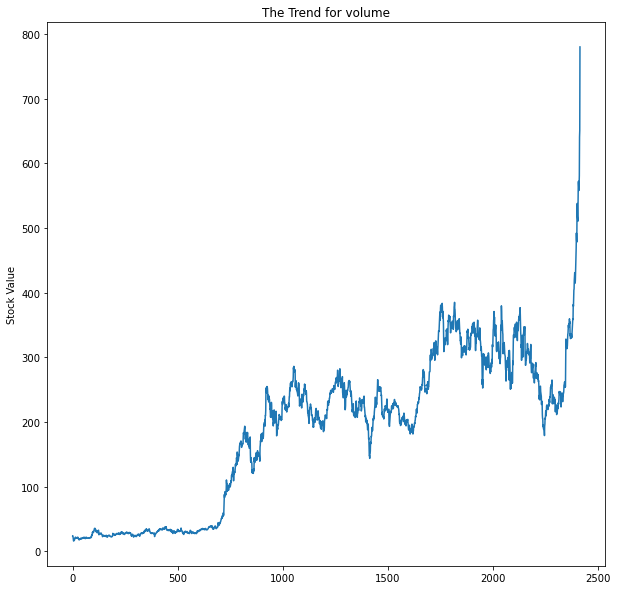

In [11]:
#plotting the trend for volume
plt.figure(figsize = (10, 10))
sns.lineplot(data= df.iloc[ : , 5])
plt.ylabel("Stock Value")
plt.title("The Trend for volume")

In [12]:
# dropping Adj Close, Volume and  Date because they are not needed in building the model
x_and_y = df.drop(columns = ['Adj Close' , 'Volume', 'Date'])


In [13]:
#normalising
scaler = MinMaxScaler()
normalised_df = pd.DataFrame(scaler.fit_transform(x_and_y), columns= x_and_y.columns)
X = normalised_df.drop(columns = ['Close'])
Y = normalised_df['Close']

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.3, random_state= 100)
linear_model = LinearRegression()
#fit the model to the training dataset
linear_model.fit(x_train, y_train)


LinearRegression()

In [15]:
predicted_values = linear_model.predict(x_test)
predicted_values

array([0.00222287, 0.00634163, 0.27253755, 0.31110874, 0.38384353,
       0.24660526, 0.26547676, 0.02504151, 0.3953181 , 0.27761527,
       0.23850545, 0.29009454, 0.38074477, 0.40494389, 0.0216031 ,
       0.3177606 , 0.28009924, 0.72884937, 0.25302811, 0.42902359,
       0.25024904, 0.31000097, 0.01517549, 0.29771596, 0.0088759 ,
       0.02779867, 0.26706982, 0.26856148, 0.37310881, 0.42546102,
       0.44204871, 0.31115222, 0.03029807, 0.37321772, 0.4278811 ,
       0.01662631, 0.01857547, 0.31745411, 0.43465115, 0.01522921,
       0.27436803, 0.24114543, 0.49386241, 0.27596352, 0.02125921,
       0.32445133, 0.24768345, 0.38142512, 0.48131307, 0.43166889,
       0.25616403, 0.01643186, 0.45661999, 0.3809256 , 0.02043869,
       0.40067979, 0.37195953, 0.39923419, 0.2867452 , 0.02570593,
       0.41274642, 0.26680251, 0.2468655 , 0.01758835, 0.31061261,
       0.34443942, 0.42708028, 0.13589058, 0.31361133, 0.01097806,
       0.02421463, 0.02817113, 0.00700148, 0.24788881, 0.31429

In [16]:
#getting the mean absolute error
mae= mean_absolute_error(y_test, predicted_values)
round(mae, 3)

0.002

In [17]:
#getting the residual sum of squares
rss= np.sum(np.square(y_test - predicted_values))
round(rss, 3)

0.005

In [18]:
#getting the mean squared error
mse = mean_squared_error(y_test, predicted_values)
round(mse, 3)

0.0

In [19]:
#getting the root mean squared error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3)

0.003

In [20]:
#getting the r2 score
r2_score = r2_score(y_test, predicted_values)
round(r2_score, 3)

1.0

In [21]:
#Comparing the predicted values to the actual values
comparison = pd.DataFrame({'Predicted Values':predicted_values,'Actual Values':y_test})
comparison.head()

,Predicted Values,Actual Values
31,0.002223,0.002355
71,0.006342,0.006059
1016,0.272538,0.275975
1694,0.311109,0.313020
1736,0.383844,0.385436


<AxesSubplot:>

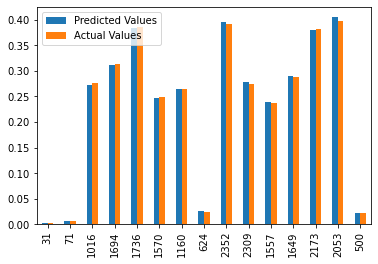

In [22]:
#plotting the comparison
graph = comparison.head(15)
graph.plot(kind='bar')